# HR Salary Prediction 

### Importing Libraries / Dependencies

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [11]:
df = pd.read_csv(r'C:\Users\DELL\Downloads\hr_salary_prediction\hr.csv')

In [12]:
df.head()

,name,age,years_of_experience,current_salary
0,Jacob,21,1,12500
1,Michael,22,2,15700
2,Matthew,22,1,10000
3,Joshua,21,1,10022
4,Christopher,23,2,15000


### Data Analysis

In [13]:
df.shape

(316, 4)

There are 315 rows and 5 columns in the HR dataset

In [14]:
# Checking for null values
df.isnull().sum()

name                   0
age                    0
years_of_experience    0
current_salary         0
dtype: int64

In [15]:
df.describe()

,age,years_of_experience,current_salary
count,316.000000,316.000000,316.000000
mean,30.465190,6.952532,25263.848101
std,7.140454,6.042781,12327.650797
min,21.000000,1.000000,6500.000000
25%,24.750000,3.000000,15850.000000
50%,29.000000,5.000000,24000.000000
75%,35.000000,9.000000,30700.000000
max,50.000000,29.000000,90000.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 316 non-null    object
 1   age                  316 non-null    int64 
 2   years_of_experience  316 non-null    int64 
 3   current_salary       316 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 10.0+ KB


### Data Visualization

C:\Users\DELL\AppData\Local\Temp\ipykernel_22756\695122566.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


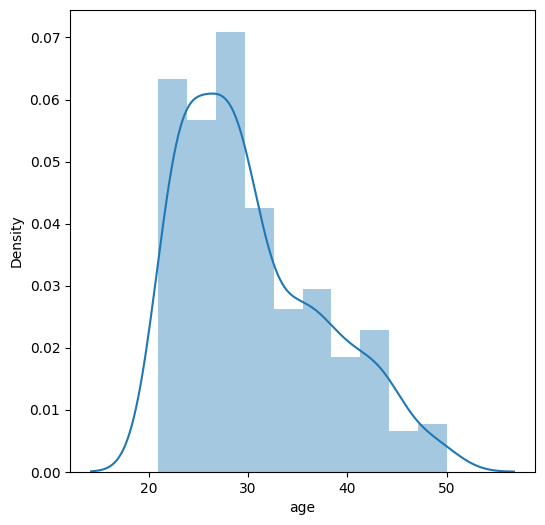

In [17]:
plt.figure(figsize = (6,6))
sns.distplot(df['age'])
plt.show()

<AxesSubplot: xlabel='years_of_experience', ylabel='count'>

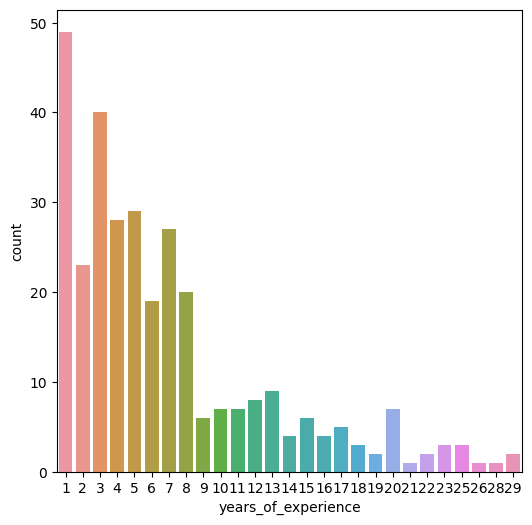

In [18]:
plt.figure(figsize = (6,6))
sns.countplot(x='years_of_experience' ,data=df)

plt.figure(figsize = (6,6))
sns.countplot(x='gender' ,data=df)

<AxesSubplot: >

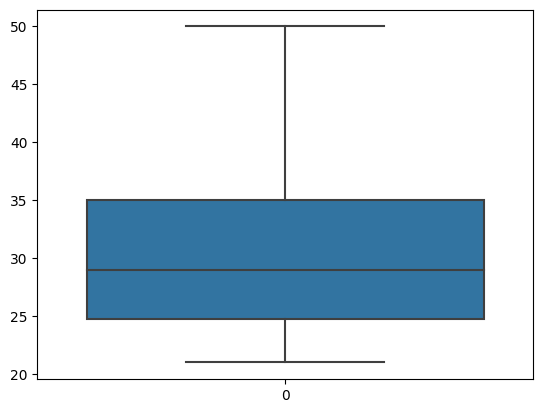

In [19]:
sns.boxplot( df['age'] )

<AxesSubplot: xlabel='years_of_experience', ylabel='age'>

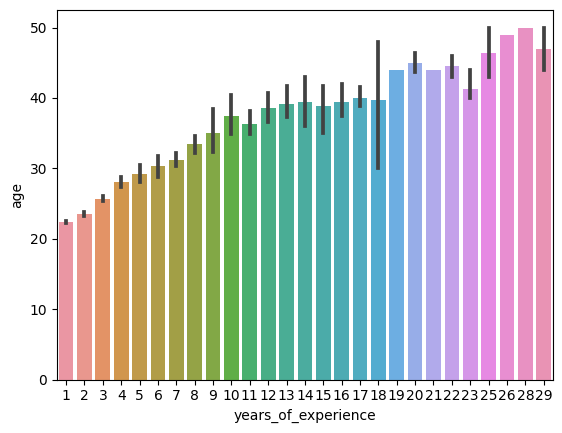

In [20]:
sns.barplot(x ="years_of_experience", y ="age", data = df)

sns.barplot(x ="gender", y ="current_salary", data = df)

<AxesSubplot: xlabel='age', ylabel='current_salary'>

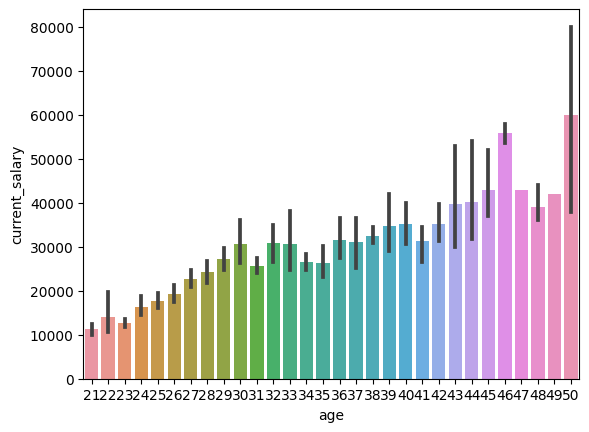

In [21]:
sns.barplot(x ="age", y ="current_salary", data = df)

<AxesSubplot: xlabel='years_of_experience', ylabel='current_salary'>

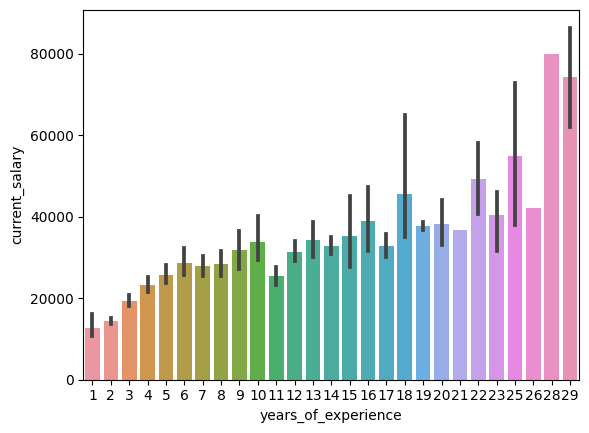

In [22]:
sns.barplot(x ="years_of_experience", y ="current_salary", data = df)

C:\Users\DELL\AppData\Local\Temp\ipykernel_22756\4080866019.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


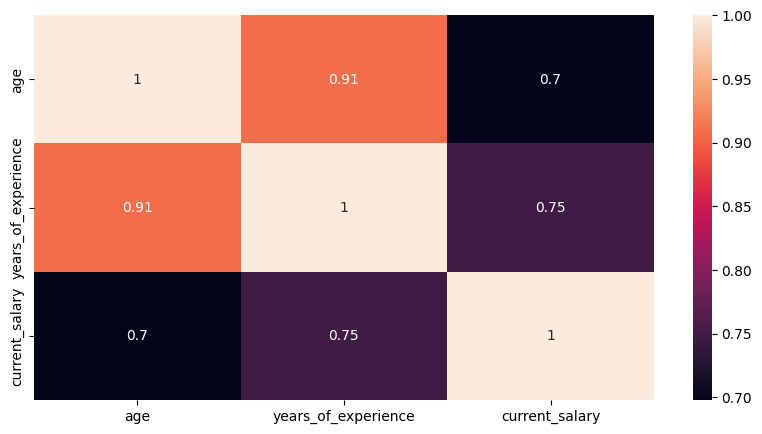

In [23]:
plt.figure(figsize=(10,5))
corr = df.corr()
sns.heatmap(corr,annot=True)
plt.show()

## Preprocessing Task before Model Building

### Selecting features based on general requirements

In [24]:
df.drop(['name'],axis=1,inplace=True)

In [25]:
df.head()

,age,years_of_experience,current_salary
0,21,1,12500
1,22,2,15700
2,22,1,10000
3,21,1,10022
4,23,2,15000


### Splitting features and target

In [26]:
X = df.drop(columns = ['current_salary'],axis=1)  # features
y = df['current_salary']  # target

In [27]:
print(X)

     age  years_of_experience
0     21                    1
1     22                    2
2     22                    1
3     21                    1
4     23                    2
..   ...                  ...
311   29                    8
312   24                    2
313   29                    8
314   23                    1
315   41                   15

[316 rows x 2 columns]


In [28]:
print(y)

0      12500
1      15700
2      10000
3      10022
4      15000
       ...  
311    25000
312    15000
313    36700
314    12500
315    32000
Name: current_salary, Length: 316, dtype: int64


### Splitting the data into training data and testing data

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1,random_state = 0)

In [31]:
X_train

,age,years_of_experience
171,26,3
52,24,3
12,28,3
278,36,10
97,38,17
...,...,...
251,26,5
192,22,1
117,28,4
47,26,3


In [32]:
y_train

171    18000
52     16125
12     27000
278    30000
97     35600
       ...  
251    20000
192    12000
117    24500
47     27000
172    15000
Name: current_salary, Length: 284, dtype: int64

In [33]:
X_test

,age,years_of_experience
134,23,1
287,23,1
55,28,4
254,27,4
276,50,25
81,22,1
116,29,5
124,42,9
311,29,8
56,24,3


In [34]:
y_test

134    12000
287    11000
55     19455
254    17800
276    38000
81     11600
116    34000
124    29500
311    25000
56     15458
222    15000
246    58000
15     30000
59     38698
259    25000
208    14700
164    32800
146    39500
153    27000
74     11000
26     21000
159    34680
199    11000
249    35000
247    30000
253    19000
133    28500
22     30000
60     58709
267    12000
7      21000
21     28000
Name: current_salary, dtype: int64